In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      22000 non-null  int64  
 1   person_age                      22000 non-null  float64
 2   person_gender                   22000 non-null  object 
 3   person_education                22000 non-null  object 
 4   person_income                   22000 non-null  float64
 5   person_emp_exp                  22000 non-null  int64  
 6   person_home_ownership           22000 non-null  object 
 7   loan_amnt                       22000 non-null  float64
 8   loan_intent                     22000 non-null  object 
 9   loan_int_rate                   22000 non-null  float64
 10  loan_percent_income             22000 non-null  float64
 11  cb_person_cred_hist_length      22000 non-null  float64
 12  credit_score                    

In [87]:
#dropping unwanted columns
df=df.drop('Unnamed: 0',axis=1)


In [88]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
21996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
21997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
21998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [89]:
#checking if dataset is balance
df['loan_status'].value_counts()

loan_status
0    12000
1    10000
Name: count, dtype: int64

balanced dataset 

#cleaning data

In [90]:
#cleaning person age column
df[df['person_age']>=100]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
9297,144.0,female,Associate,7200766.0,124,MORTGAGE,5000.0,PERSONAL,12.73,0.0,25.0,850,No,0
14930,116.0,male,Bachelor,5545545.0,93,MORTGAGE,3823.0,VENTURE,12.15,0.0,24.0,708,No,0
15113,109.0,male,High School,5556399.0,85,MORTGAGE,6195.0,VENTURE,12.58,0.0,22.0,792,No,0


In [91]:
df[df['person_age']<0]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


In [92]:
df=df[df['person_age']<=100]
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
2,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
3,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
4,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  int64  
 2   person_education                21182 non-null  int64  
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  int64  
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  int64  
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

<Axes: ylabel='person_age'>

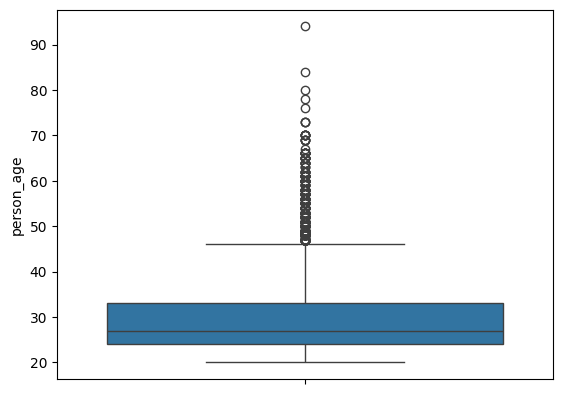

In [93]:
#checking outliers
sns.boxplot(df['person_age'])

#we know person age should be less than 100 so we can ignore this outliers

<Axes: ylabel='person_income'>

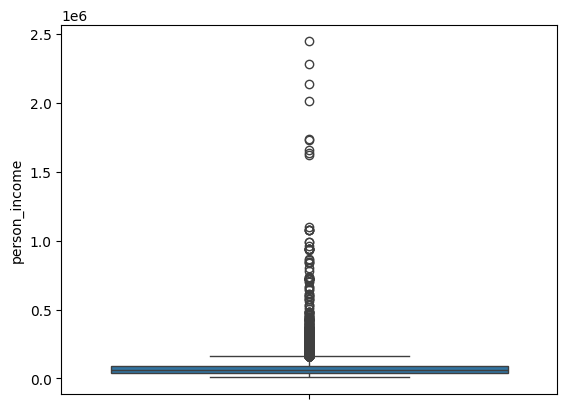

In [94]:
#checking outliers in income column
sns.boxplot(df['person_income'])

#ignoring this because mostly all values are considderd as outliers here


In [95]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,21997.000000,2.199700e+04,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000,21997.000000
mean,29.258490,7.512687e+04,6.733327,9952.679775,11.549953,0.158124,6.899714,633.827386,0.454607
std,7.124086,6.918483e+04,7.175773,6561.095247,3.026160,0.097791,4.587666,50.857061,0.497947
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,418.000000,0.000000
25%,24.000000,4.286500e+04,1.000000,5000.000000,9.450000,0.080000,3.000000,602.000000,0.000000
50%,27.000000,6.213000e+04,4.000000,8400.000000,11.230000,0.140000,5.000000,640.000000,0.000000
75%,33.000000,8.965500e+04,10.000000,13650.000000,13.640000,0.220000,9.000000,671.000000,1.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.630000,30.000000,784.000000,1.000000


<Axes: ylabel='credit_score'>

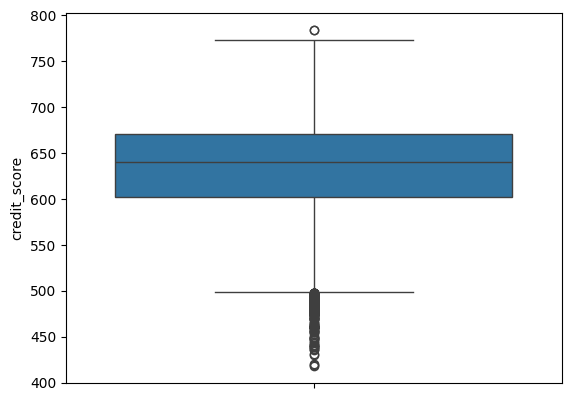

In [96]:
#checking outliers in credit score because it should be not less than
#500 but here min value is 418
sns.boxplot(df['credit_score'])

<Axes: ylabel='credit_score'>

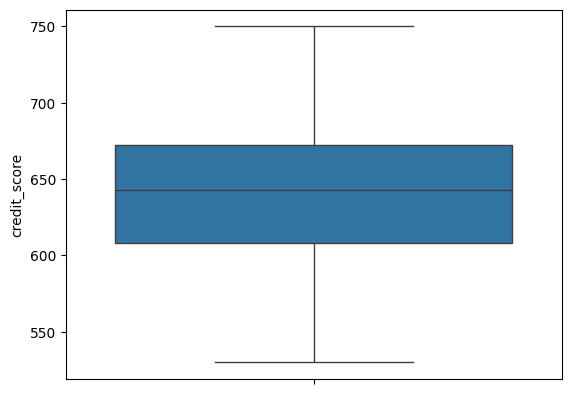

In [97]:
#handling outliers in credit score column
df=df[(df['credit_score']>=530)&(df['credit_score']<=750)]
sns.boxplot(df['credit_score'])


In [98]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,21182.000000,2.118200e+04,21182.000000,21182.000000,21182.000000,21182.000000,21182.000000,21182.000000,21182.000000
mean,29.300680,7.527923e+04,6.774289,9961.946370,11.552363,0.157856,6.925267,638.447550,0.454112
std,7.095037,6.922787e+04,7.147597,6569.488193,3.031500,0.097728,4.588011,44.860904,0.497902
min,20.000000,8.000000e+03,0.000000,563.000000,5.420000,0.000000,2.000000,530.000000,0.000000
25%,24.000000,4.295700e+04,1.000000,5000.000000,9.450000,0.080000,3.000000,608.000000,0.000000
50%,27.000000,6.225800e+04,5.000000,8400.000000,11.230000,0.140000,5.000000,643.000000,0.000000
75%,33.000000,8.973500e+04,10.000000,13726.500000,13.650000,0.220000,9.000000,672.000000,1.000000
max,80.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.630000,30.000000,750.000000,1.000000


In [99]:
#copy string dataset and cleaned dataset
copied_dataset=df.copy()

In [100]:
#converting string column into numeric by label encoder

obj=LabelEncoder()
for i in df.columns:
    if df[i].dtype==object:
        df[i]=obj.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21182 entries, 0 to 21999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      21182 non-null  float64
 1   person_gender                   21182 non-null  int64  
 2   person_education                21182 non-null  int64  
 3   person_income                   21182 non-null  float64
 4   person_emp_exp                  21182 non-null  int64  
 5   person_home_ownership           21182 non-null  int64  
 6   loan_amnt                       21182 non-null  float64
 7   loan_intent                     21182 non-null  int64  
 8   loan_int_rate                   21182 non-null  float64
 9   loan_percent_income             21182 non-null  float64
 10  cb_person_cred_hist_length      21182 non-null  float64
 11  credit_score                    21182 non-null  int64  
 12  previous_loan_defaults_on_file  21182

In [101]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
2,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
3,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
4,21.0,0,3,12951.0,0,2,2500.0,5,7.14,0.19,2.0,532,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
21996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
21997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
21998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [102]:
#spliting train and test data
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

#Support vector classifer

In [104]:
model=SVC(kernel='rbf')
model.fit(xtrain,ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [105]:
print('training_efficiency',model.score(xtrain,ytrain))
print('testing efficiceny',model.score(xtest,ytest))

training_efficiency 0.7130909826667566
testing efficiceny 0.7110936270653029


#Randomforestclassifier

training_efficiency 0.7132816605359958
testing efficiceny 0.7147892720306513


In [106]:
rfmodel=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rfmodel.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
print('training_efficiency',rfmodel.score(xtrain,ytrain))
print('testing efficiceny',rfmodel.score(xtest,ytest))

training_efficiency 0.8895933095029338
testing efficiceny 0.8841856805664831


#logistic regression

In [108]:
lrmodel=LogisticRegression()
lrmodel.fit(xtrain,ytrain)

c:\Users\aarti\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [109]:
print('training_efficiency',lrmodel.score(xtrain,ytrain))
print('testing efficiceny',lrmodel.score(xtest,ytest))

training_efficiency 0.763404599716733
testing efficiceny 0.7647521636506688


#here we can see Randomforestclassifer gives good efficiency compared to other


In [110]:
#creating new dataset from copied dataset
copied_dataset.to_csv('new_df.csv')

In [111]:
#pickle
with open('rfmodel','wb') as file:
    pickle.dump(rfmodel,file)

In [112]:
import sklearn

sklearn.__version__

'1.7.1'

In [114]:
df['person_income'].value_counts()

person_income
8000.0      15
37020.0      6
73011.0      6
53638.0      6
60864.0      6
            ..
82443.0      1
14288.0      1
34703.0      1
14988.0      1
184295.0     1
Name: count, Length: 18375, dtype: int64